# MODEL 1 - Temperature Prediction (Regression)


*   This notebook will demonstrate how we prepare data for the Linear regression model. The trained model will have the capability of predicting Tomorrow Average Temperature.

*   Linear Regression is a suitable choice for predicting tomorrow's average temperature because temperature is a continuous variable. Linear regression is appropriate as it directly predicts a continuous outcome rather than classifying data into categories. Additionally, the coefficients in a linear regression model indicate the expected change in the target variable for a one-unit change in the corresponding feature, making it easy to interpret how different factors influence temperature.



## 1. Necessary Libraries


First of all, we import all necessary Python libraries for data processing. Here is list of libraries and components used building and evaluating a Linear Regression model in this notebook:


*   Scikit-learn (train_test_split module): Splits the dataset into training and testing sets.

*   Scikit-learn (LinearRegression module): Implements the linear regression algorithm to fit a linear model to the dataset.

*   Scikit-learn (mean_squared_error and r2_score): Evaluation metrics used to measure the performance of the linear regression model. Mean squared error calculates the average squared difference between actual and predicted values, while R² score evaluates how well the model explains the variability in the data.

*   Scikit-learn (StandardScaler module): Standardizes features by removing the mean and scaling to unit variance.







In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

## 2. Load the dataset



*   Firstly, we load the melbourne_weather.csv data file which is the result of our data pre-processing part.

*   To get this data file, please refer to our Data Processing notebook's instruction.

*   Next we display all columns of this dataset.





In [ ]:
melbourne_origin = pd.read_csv('melbourne_weather.csv')
melbourne_origin.columns

Index(['index', 'Date', 'Location', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'RainTomorrow', 'tempmax',
       'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunset', 'moonphase', 'TomorrowTemp'],
      dtype='object')

After that, we check the percentage of missing data in every column in this dataset.

In [ ]:
#Checking percentage of missing data in every column

(melbourne_origin.isnull().sum()/len(melbourne_origin))*100

,0
index,0.000000
Date,0.000000
Location,2.711761
Rainfall,25.807434
Evaporation,2.803169
Sunshine,2.742230
WindGustDir,2.711761
WindGustSpeed,3.138330
WindDir9am,2.711761
WindDir3pm,2.711761


## 3. Adding Features and Pre-processing data before training model

### 3.1. Select essential features



Refer to our problem framing for this project, to develop the model for Average Weather Prediction, we only select essential weather feature (features)  which  can influence the temperature prediction.
Here’s why each feature might be useful in predicting TomorrowTemp (target):



*   Sea Level Pressure (sealevelpressure): Atmospheric pressure at sea level affects weather patterns, including temperature changes. Low pressure is often associated with stormy weather and potentially cooler temperatures, while high pressure can lead to clear, warmer conditions.

*   Evaporation: The amount of water evaporated influences humidity and temperature. High evaporation rates can indicate warmer conditions, as more energy is required to evaporate water, and it also reflects the atmospheric dryness.

*   Humidity: Humidity refers to the amount of moisture in the air. High humidity can affect how we perceive temperature and the likelihood of precipitation, which can influence cooling or warming trends.

*   Dew Point (dew): Dew point is the temperature at which air becomes saturated with moisture and dew forms. It’s closely related to humidity and can provide insight into overnight cooling. A higher dew point typically indicates more moisture in the air, which can lead to warmer overnight temperatures.

*   Temperature (temp): Current temperature is naturally one of the strongest predictors of future temperatures. It provides context for the daily thermal cycle and trends in cooling or warming, which help predict tomorrow's temperature.

By including these features, we are taking into account the factors that  help in building a more accurate predictive model for TomorrowTemp (target).

Explanations for below codes:

*   features: This list contains the independent variables (predictors) that are important for predicting the target variable.


*   target: This is the dependent variable (the value we want to predict). In this case, TomorrowTemp is the target, representing the temperature we want to forecast for the next day.


*   Next, we create a new dataframe called 'melbourne' by selecting only the columns listed in 'features' and 'target'. This ensures that the melbourne DataFrame contains only the columns necessary for our Average Temperature Prediction model.







In [ ]:
# Select features and target
features = ['sealevelpressure', 'Evaporation', 'humidity', 'dew', 'temp',]
target = 'TomorrowTemp'
melbourne = melbourne_origin[features + [target]]

melbourne

,sealevelpressure,Evaporation,humidity,dew,temp,TomorrowTemp
0,1007.1,2.8,62.3,4.0,11.1,10.6
1,1014.6,5.2,71.5,5.5,10.6,9.6
2,1023.8,2.0,78.4,5.9,9.6,8.9
3,1028.4,1.8,83.4,5.9,8.9,7.9
4,1026.1,0.8,78.1,4.0,7.9,11.7
...,...,...,...,...,...,...
3277,1027.9,0.6,81.8,8.4,11.4,10.6
3278,1026.1,0.6,74.2,5.8,10.6,10.9
3279,1016.9,1.6,71.9,5.9,10.9,10.4
3280,1017.4,1.8,69.4,4.8,10.4,11.2


### 3.2.  Pre-processing data before training model

Refer to the output of lines of code above, we recognize that there are some missing values in selected columns.


*   dropna(): This method removes rows from the DataFrame that contain missing values (NaN) in any column. This step is important because Linear Regression algorithms cannot handle missing values directly.

*   inplace=True: This argument modifies the DataFrame in place, meaning it directly updates the melbourne DataFrame rather than returning a new DataFrame with the missing values dropped.

*   Finally, we display the clean dataframe.









In [ ]:
# Drop na
melbourne.dropna(inplace=True)
melbourne

,sealevelpressure,Evaporation,humidity,dew,temp,TomorrowTemp
0,1007.1,2.8,62.3,4.0,11.1,10.6
1,1014.6,5.2,71.5,5.5,10.6,9.6
2,1023.8,2.0,78.4,5.9,9.6,8.9
3,1028.4,1.8,83.4,5.9,8.9,7.9
4,1026.1,0.8,78.1,4.0,7.9,11.7
...,...,...,...,...,...,...
3276,1026.8,2.4,76.4,6.8,11.0,11.4
3277,1027.9,0.6,81.8,8.4,11.4,10.6
3278,1026.1,0.6,74.2,5.8,10.6,10.9
3279,1016.9,1.6,71.9,5.9,10.9,10.4


## 4. Data Visualization

### 4.1. Summary

To explore relationships between selected features ('sealevelpressure', 'Evaporation', 'humidity', 'dew') and target variable (TomorrowTemp), we perform following visualizations:


*   Pair plot: Visualize the relationships of 2 specifically selected features. For example: Evapration - Humidity, Dew - Evaporation, etc. There are totally 16 pairs. This would help observe potential correlations between features, identify patterns, and detect outliers.

*   Individual scatter plots with Regression lines: Visualize the relationship between each individual feature and the target variable. This would help showcase trend and influence of each feature on the target variable.





### 4.2. Key Implementation Explanations




1.   For these visualizations, we use Seaborn library for drawing attractive statiscal graphics.
---

2.   Creating a Pair Plot

*   sns.pairplot(): This function creates a pair plot to visualize pairwise relationships in the dataset.

*   melbourne[features[:-1]]: It selects all columns in the DataFrame specified by features except the last one (target variable).
---

3.   Creating Individual Scatter Plots with Regression Lines

*   We create a loop iterating over each feature (except target variable).

*   enumerate(features[:-1]): Provides both the index (i) and the feature.
---

4.   Fitting a Linear Regression Model

*   X = melbourne[feature].values.reshape(-1, 1): Reshapes the feature values for fitting a regression model.

*   y = melbourne[target].values: Gets the target variable values.

*   reg = LinearRegression().fit(X, y): Initializes a linear regression model and fits it to the data (X for features and y for the target).

*   reg.predict(X): Generates predicted values based on the fitted model.













<Figure size 2000x2000 with 0 Axes>

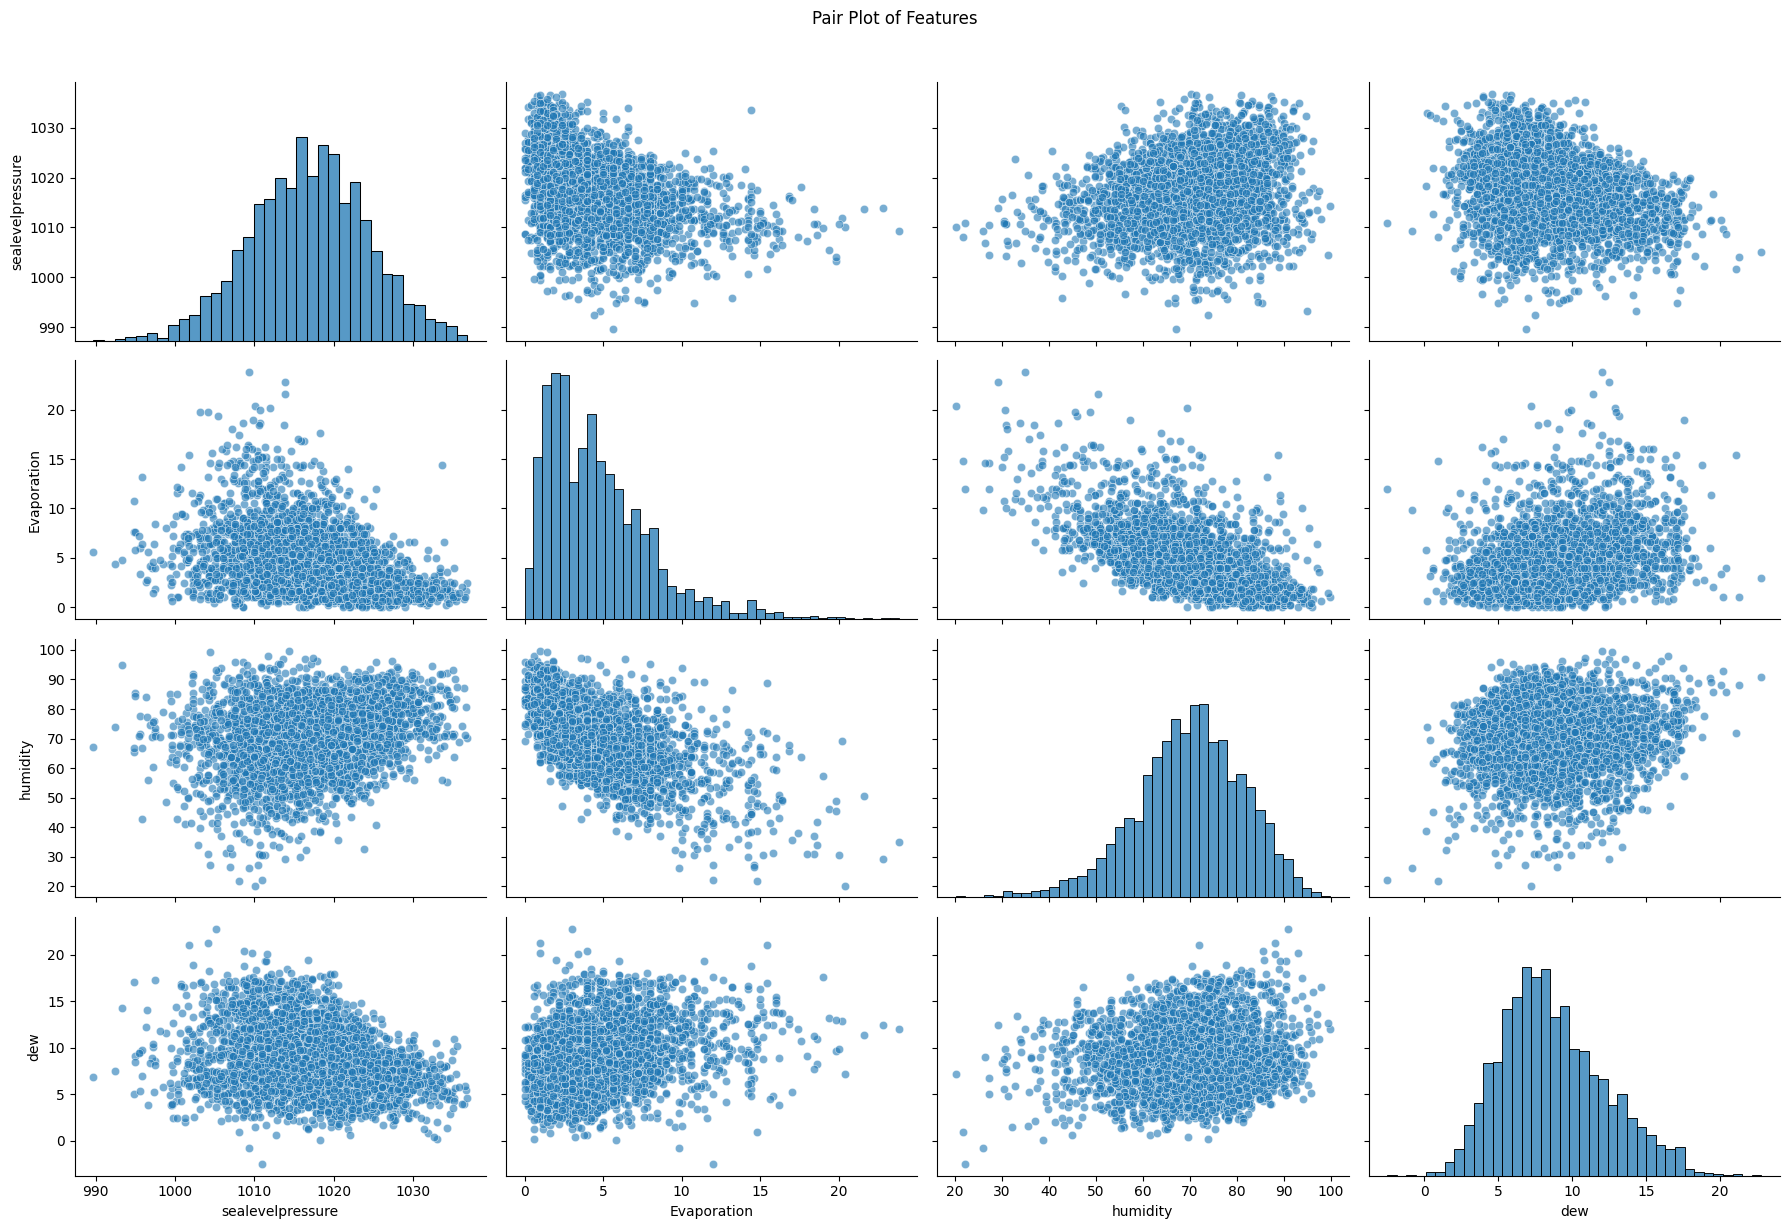

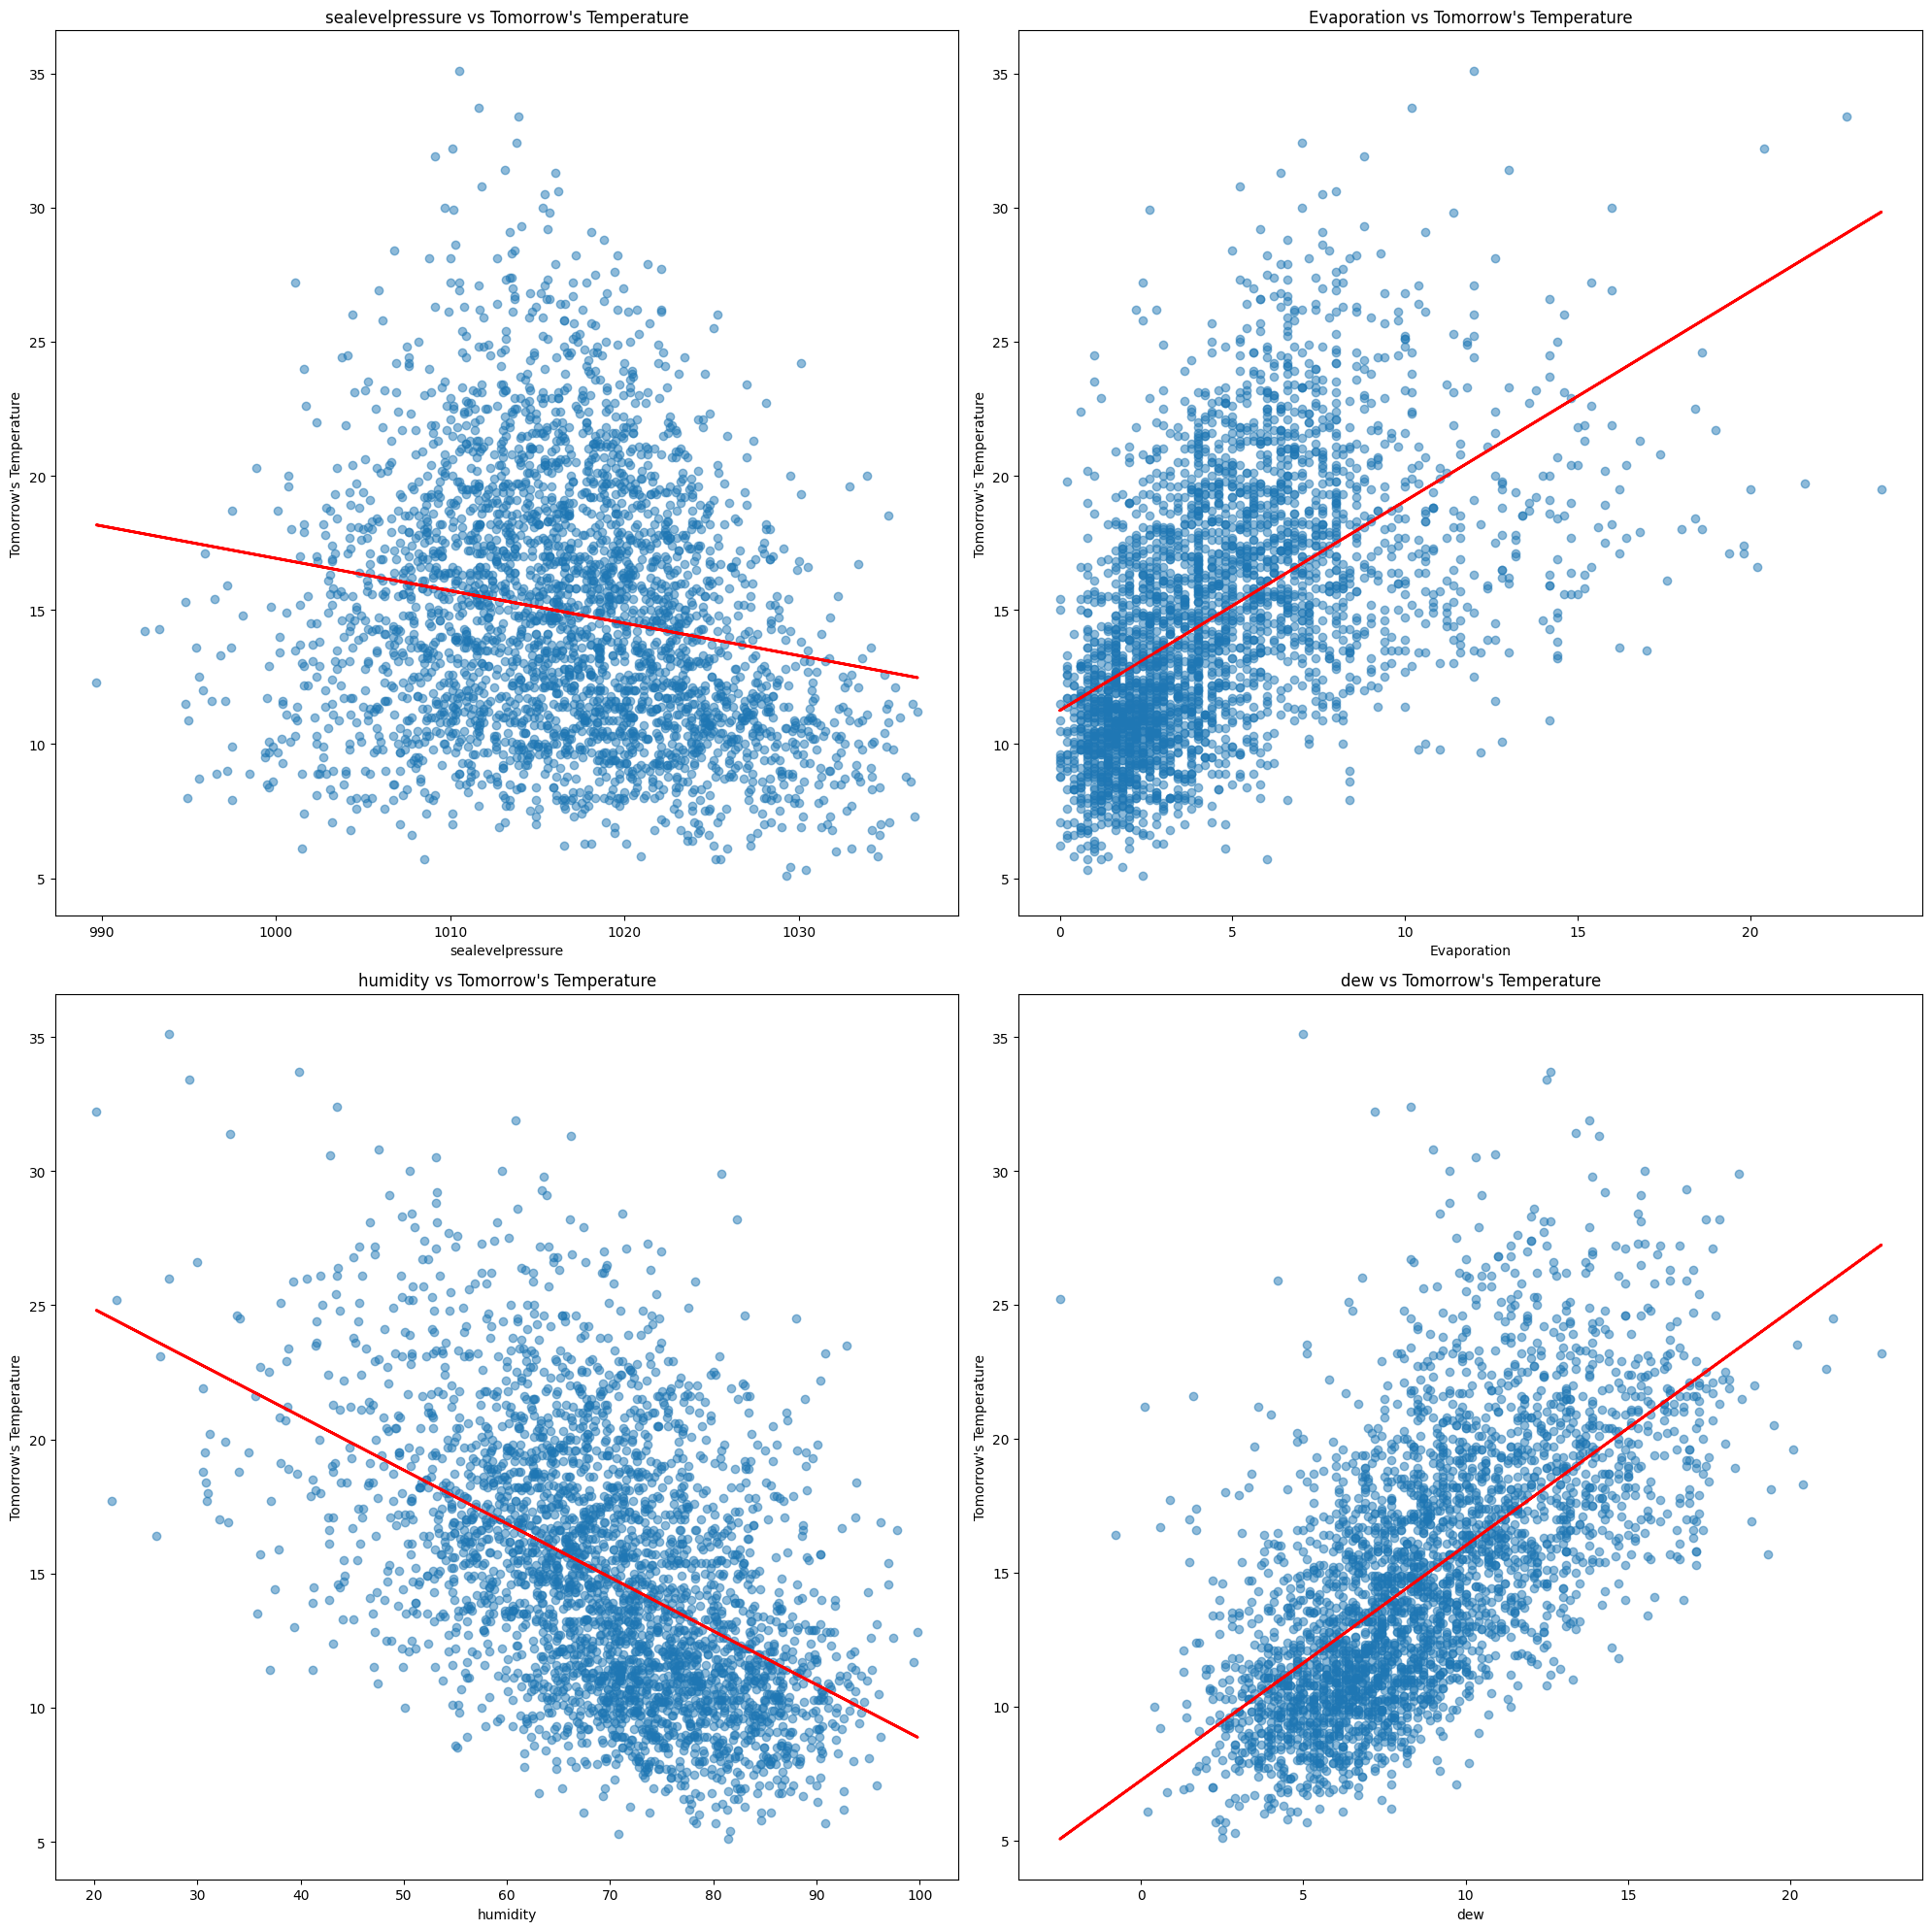

In [ ]:
import seaborn as sns

# Create pair plot
plt.figure(figsize=(20, 20))
sns.pairplot(melbourne[features[:-1]], height=3, aspect=1.5, plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Features", y=1.02)
plt.tight_layout()
plt.show()

# Create individual scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(features[:-1]):
    ax = axes[i]

    # Scatter plot
    ax.scatter(melbourne[feature], melbourne[target], alpha=0.5)

    # Fit linear regression
    X = melbourne[feature].values.reshape(-1, 1)
    y = melbourne[target].values
    reg = LinearRegression().fit(X, y)

    # Plot regression line
    ax.plot(X, reg.predict(X), color='red', linewidth=2)

    ax.set_xlabel(feature)
    ax.set_ylabel('Tomorrow\'s Temperature')
    ax.set_title(f'{feature} vs Tomorrow\'s Temperature')

plt.tight_layout()
plt.show()

## 5. Average Temperature Predicting Model Development

### 5.1. Scaling Features





*   Before training model, we scale features because Linear regression algorithm requires that the input features have a similar scale. If one feature has a much larger range than others, it can dominate the objective function and affect the model's performance.

*   StandardScaler() standardizes the features by removing the mean and scaling to unit variance. It transforms the data so that each feature has a mean of 0 and a standard deviation of 1.

*   Next, we separate the features (X_scaled) from the target variable (y_scaled). This step is essential for training linear regression model, as it needs to know which variables it should use to predict the target variable.






In [ ]:
# Scale the features
scaler = StandardScaler()
melbourne_scaled = scaler.fit_transform(melbourne)

X_scaled = melbourne_scaled[:, :-1]
y_scaled = melbourne_scaled[:, -1]

### 5.2. Splitting Data

We split the data into training and testing sets:

*   Training Set: Used to fit the model.

*   Testing Set: Used to evaluate the model's performance. We set 20% of the data used for testing.



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train

array([[-0.75998925,  1.85174913, -3.38161331, -0.88123829,  2.6221804 ],
       [ 0.01680745, -0.79827974,  0.94869242,  1.24463965,  0.39878353],
       [-0.52831304,  1.30969777,  0.52769047,  1.07456941,  0.39878353],
       ...,
       [-0.32389286,  1.12901398, -1.64605427,  0.79111902,  2.06113633],
       [-0.37840491, -0.0755446 , -0.34008905,  0.30925336,  0.3364453 ],
       [ 2.25180149, -1.09941939,  1.89379883, -0.11592223, -1.07655458]])

### 5.3. Create and train the model


*    Firstly, we initialize an instance of the LinearRegression class from the sklearn.linear_model module. This instance represents the linear regression model that we use to train data.

*   Linear Regression is used to model the relationship between independent variables (features) and a dependent variable (target). The goal is to find the best-fitting line that minimizes the difference between the predicted and actual values.

*   Next, we use fit method to call model instance to train the linear regression model using the training data (X_train for features and y_train for the target variable). The method computes the coefficients (weights) for each feature in X_train that minimize the sum of squared residuals (the difference between observed and predicted values).

*   Once trained, the model will be able to make predictions based on the patterns learned from the training data.





In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 5.4. Make Predictions and Evaluate the model



 We use predict method of the LinearRegression model to generate predictions (y_pred) for the test dataset (X_test). These predictions represent the model's estimate of tomorrow's average temperature based on the input features.





To eveluate the model, we use 3 evaluation metrics:

*   Mean Squared Error (MSE): This metric calculates the average squared difference between the actual values (y_test) and the predicted values (y_pred). A lower MSE indicates better model performance.

*   Root Mean Squared Error (RMSE): This is the square root of MSE and provides an error metric in the same units as the target variable (TomorrowTemp).

*   R-squared Score (R²): This statistic indicates the proportion of variance in the dependent variable (TomorrowTemp) that can be explained by the independent variables (features). R² values range from 0 to 1, with higher values indicating a better fit.






In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R-squared score: {r2:.2f}")

Mean squared error: 0.26
Root mean squared error: 0.51
R-squared score: 0.76


Refer to the evaluation outputs above:

*   MSE of 0.26 suggests that the model's predictions are reasonably close to the actual values.

*   An RMSE of 0.51 suggests that, on average, the model's predictions are about 0.51 degrees away from the actual temperature. This is a manageable error margin in temperature forecasting.

*   The R² score indicates that approximately 76% of the variance in tomorrow's average temperature can be explained by the selected features (sealevelpressure, evaporation, humidity, and dew).






------
*   Now we make a sample prediction using the trained Linear Regression model by selecting the first row from the dataframe.   

*   Next, we transform the sample data into the same scale as the training data.

*   After that, the model makes a prediction based on the scaled features of the sample (excluding the target variable).

*   Next, we combine the scaled features of the sample with the scaled prediction to reverse the scaling process. np.concatenate() is used to create a new array containing the scaled features and the scaled prediction, and the scaler.inverse_transform() transforms it back to the original scale. The prediction is extracted from the resulting array, specifically targeting the last column which contains the predicted value.





In [ ]:
# Optional: Make a sample prediction
sample = melbourne.iloc[0]
sample_scaled = scaler.transform([sample])
sample_scaled

prediction_scaled = model.predict(sample_scaled[:, :-1])
prediction = scaler.inverse_transform(np.concatenate((sample_scaled[:, :-1], prediction_scaled.reshape(-1, 1)), axis=1))[:, -1]

print(f"\nSample prediction: {prediction}")
print(f"Actual value: {sample['temp']}")


Sample prediction: [10.73853942]
Actual value: 11.1


Refer to the output above, we can compare the predicted and actual values on a specific instance from the dataset.

### 5.5. Visualization of predicted and actual values


In this section, we visualize the actual versus predicted values of tomorrow's average temperature, using the results from the Linear Regression model.






*   First of all, we reverse the scaling applied to the test target variable (y_test). It combines the scaled feature set X_test with the scaled target variable, then applies the inverse transformation to return y_test to its original scale. Similar for y_pred_inverse.

*   Next, we define a variable step to select every 5th data point for plotting. np.arange generates an array of indices that will be used to select a subset of the data for visualization, which helps in avoiding overcrowding of points on the plot.

*   After that, we plot the actual temperature values from the inverse scaled test set.

*   Next, we plot the predicted temperature values from the inverse scaled predictions.




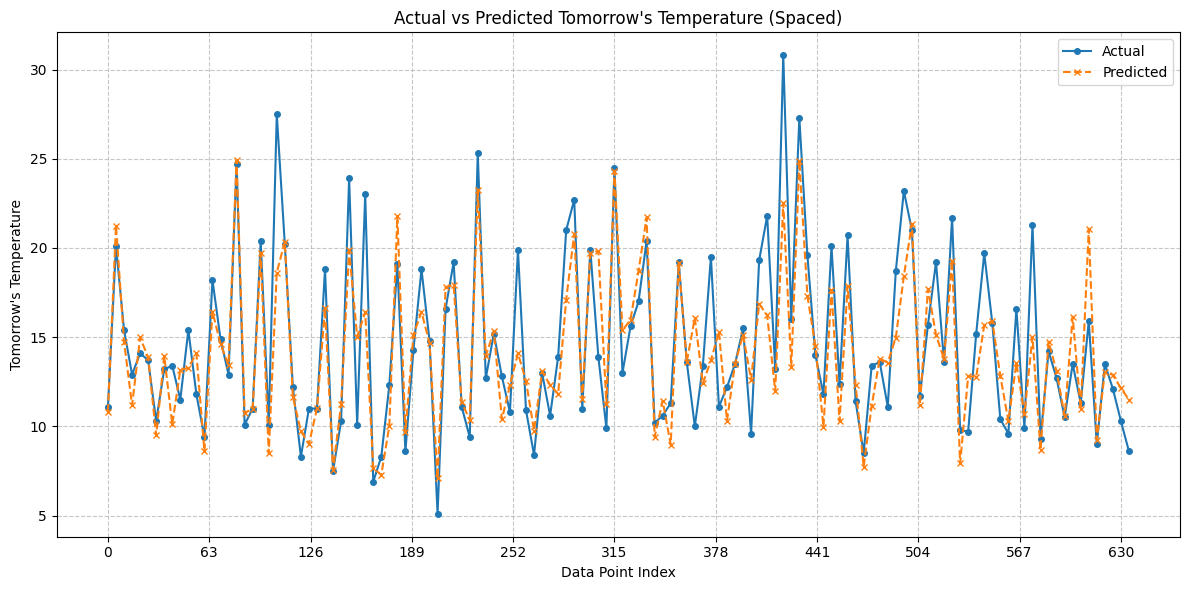

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Inverse scaled data
y_test_inverse = scaler.inverse_transform(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_inverse = scaler.inverse_transform(np.concatenate((X_test, y_pred.reshape(-1, 1)), axis=1))[:, -1]

# Create a subset of the data (e.g., every 5th point)
step = 5
subset_indices = np.arange(0, len(y_test_inverse), step)

plt.figure(figsize=(12, 6))

# date_index = melbourne_origin['Date']

# Plot actual values
plt.plot(subset_indices, y_test_inverse[subset_indices], label='Actual', marker='o', linestyle='-', markersize=4)

# Plot predicted values
plt.plot(subset_indices, y_pred_inverse[subset_indices], label='Predicted', marker='x', linestyle='--', markersize=4)

plt.xlabel('Data Point Index')
plt.ylabel('Tomorrow\'s Temperature')
plt.title('Actual vs Predicted Tomorrow\'s Temperature (Spaced)')
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust x-axis ticks for better spacing
plt.xticks(np.arange(0, len(y_test_inverse), len(y_test_inverse)//10))

plt.tight_layout()
plt.show()

In conclusion, we visualize the performance of the Linear Regression model by comparing the actual and predicted average temperatures.  By plotting these values, we can visually assess how well the model predicts the target variable over a range of data points, making it easier to identify any discrepancies or trends in the predictions.

## 6. Save the model

In [ ]:
import pickle

# Save the model to a file
filename = 'model_1.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved to {filename}")


Model saved to model_1.pkl
